## Learning Objectives:

1. Gaining an intuitive technical understanding of bias in machine learning systems.

2. Exploring the interplay between data, algorithms, application, workflow, and human context when considering responsible AI.

# Part One: Setup

## 1.1 - 🛠️ Install `responsibly`

In [ ]:
%pip install --user responsibly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---

### You might need to restart youe notebook
If you get an error of **`ModuleNotFoundError: No module named 'responsibly'`** after the `import responsibly` in the next cell, and you work on either **Colab** or **Binder** - this is **normal**.
<br/> <br/>
**Restart** the Kernel/Runtime (use the menu on top or the botton in the notebook), **skip** the installation cell (`!pip install --user responsibly`) and **run** the previous cell again (`import responsibly`).

Now it should all work fine!

---

## 1.2 - Validate Installation of `responsibly`

In [ ]:
import responsibly

# You should get '0.1.3'
responsibly.__version__

'0.1.3'

# Part Two: Examples of Bias in Language Technology

## 2.1 - Translation

<img src="https://github.com/ResponsiblyAI/word-embedding/blob/main/images/example-translate.jpg?raw=1"/>

Source: [Google Blog](https://www.blog.google/products/translate/reducing-gender-bias-google-translate/), [Google AI Blog](https://ai.googleblog.com/2018/12/providing-gender-specific-translations.html)

## 2.2 - Automated Speech Recognition (ASR) 

<img src="https://github.com/ResponsiblyAI/word-embedding/blob/main/images/asr-wer.jpg?raw=1" />

WER = Average Word Error Rate

`(substitutions + deletions + insertions) / total number of words`

Koenecke, Allison, Andrew Nam, Emily Lake, Joe Nudell, Minnie Quartey, Zion Mengesha, Connor Toups, John R. Rickford, Dan Jurafsky, and Sharad Goel. "[Racial disparities in automated speech recognition](https://www.pnas.org/content/117/14/7684)." Proceedings of the National Academy of Sciences 117, no. 14 (2020): 7684-7689.

[Stanford News](https://news.stanford.edu/2020/03/23/automated-speech-recognition-less-accurate-blacks/)

## 2.3 - Recruiting tool

"Amazon scraps secret AI recruiting tool that showed bias against women" ([Reuters](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G))

"But by 2015, the company realized its new system was not rating candidates for software developer jobs and other technical posts in a gender-neutral way."


## 2.4 - Natural Language Generation  (based on language models)


### WARNING: The following demonstration contains examples which are offensive in nature.


[Write With Transformer](https://transformer.huggingface.co/doc/gpt2-large) (OpenAI GPT-2)

<img src="https://github.com/ResponsiblyAI/word-embedding/blob/main/images/nlg-prompt.png?raw=1" width="400"/>

1. Sheng, E., Chang, K. W., Natarajan, P., & Peng, N. (2019). [The woman worked as a babysitter: On biases in language generation](https://arxiv.org/pdf/1909.01326.pdf). arXiv preprint arXiv:1909.01326.
2. [StereoSet](https://stereoset.mit.edu/)
Nadeem, M., Bethke, A., & Reddy, S. (2020). [StereoSet: Measuring stereotypical bias in pretrained language models](https://arxiv.org/pdf/2004.09456.pdf). arXiv preprint arXiv:2004.09456.

<img src="https://github.com/ResponsiblyAI/word-embedding/blob/main/images/banner.png?raw=1" />

# Part Three: Gender Bias

**⚡ We use the word *bias* merely as a technical term, without jugement of "good" or "bad". Later on we will put the bias into *human contextes* to evaluate it.**

Keep in mind, the data is from Google News, the writers are professional journalists.

Bolukbasi Tolga, Kai-Wei Chang, James Y. Zou, Venkatesh Saligrama, and Adam T. Kalai. [Man is to computer programmer as woman is to homemaker? debiasing word embeddings](https://arxiv.org/abs/1607.06520). NIPS 2016.

In [ ]:
from responsibly.we import load_w2v_small

w2v_small = load_w2v_small()

## 3.1 - Gender appropriate he-she analogies

In [ ]:
# she:sister :: he:?
# sister - she + he = ?

w2v_small.most_similar(positive=['sister', 'he'],
                       negative=['she'])

[('brother', 0.7627110481262207),
 ('younger_brother', 0.6856132745742798),
 ('cousin', 0.6685015559196472),
 ('uncle', 0.6580697894096375),
 ('nephew', 0.65260249376297),
 ('father', 0.6411106586456299),
 ('son', 0.630827009677887),
 ('elder_brother', 0.585418701171875),
 ('brothers', 0.5706700086593628),
 ('twin_brother', 0.5622221231460571)]

```
queen-king
waitress-waiter
sister-brother
mother-father
ovarian_cancer-prostate_cancer
convent-monastery
```

## 3.2 - Gender stereotype he-she analogies

In [4]:
from responsibly.we import most_similar

In [ ]:
w2v_small.most_similar(positive=['nurse', 'he'],
                       negative=['she'])

[('doctor', 0.5559606552124023),
 ('medic', 0.5425378680229187),
 ('physician', 0.5394272208213806),
 ('surgeon', 0.5160146951675415),
 ('nurses', 0.49741458892822266),
 ('paramedic', 0.4924110770225525),
 ('patient', 0.46544164419174194),
 ('doctors', 0.4639861285686493),
 ('nursing', 0.46371760964393616),
 ('registered_nurse', 0.46238088607788086)]

## Exercise 1.0: Can you find other gender stereotypes? 

In [1]:
## Your code goes here

## 3.3 - What can we take from analogies? Gender Direction!

### $\overrightarrow{she} - \overrightarrow{he}$

In practice, we calculate the gender direction using multiple definitional pair of words for better estimation (words may have more than one meaning):

- woman - man
- girl - boy
- she - he
- mother - father
- daughter - son
- gal - guy
- female - male
- her - his
- herself - himself
- Mary - John

In [ ]:
from numpy.linalg import norm

gender_direction = w2v_small['she'] - w2v_small['he']

gender_direction /= norm(gender_direction)

In [ ]:
gender_direction @ w2v_small['herself']

0.3708599

In [ ]:
gender_direction @ w2v_small['himself']

-0.36822695

## Exercise 2.0: Calculate gender_direction (she - he) with respect to "architect" and "interior_designer". Are they positive or negative? Why?

In [2]:
### Your code goes here

**⚡Interprete carefully: The word *architect* appears in more contexts with *he* than with *she*, and vice versa for *interior designer*.**

## 3.7 - Projections

In [ ]:
from responsibly.we import GenderBiasWE

w2v_small_gender_bias = GenderBiasWE(w2v_small, only_lower=True)

In [ ]:
w2v_small_gender_bias.positive_end, w2v_small_gender_bias.negative_end

('she', 'he')

In [ ]:
# gender direction
w2v_small_gender_bias.direction[:10]

array([-0.10056252, -0.09987912, -0.05384335,  0.00480521,  0.01521063,
       -0.01666582,  0.00932552, -0.00625998, -0.11320096,  0.03992424])

In [ ]:
from responsibly.we.data import BOLUKBASI_DATA

neutral_profession_names = BOLUKBASI_DATA['gender']['neutral_profession_names']

In [ ]:
neutral_profession_names[:8]

['accountant',
 'acquaintance',
 'actor',
 'adjunct_professor',
 'administrator',
 'adventurer',
 'advocate',
 'aide']

Note: Why `actor` is in the neutral profession names list while `actress` is not there?
1. Due to the statistical nature of the method that is used to find the gender- specific and natural words
2. That might be because `actor` nowadays is much more gender-neutral, compared to waiter-waitress (see [Wikipedia - The term Actress](https://en.wikipedia.org/wiki/Actor#The_term_actress))

In [ ]:
len(neutral_profession_names)

303

In [ ]:
# the same of using the @ operator on the bias direction

w2v_small_gender_bias.project_on_direction(neutral_profession_names[0])

0.008421647916552755

**Let's visualize the projections of professions (neutral and specific by the orthography) on the gender direction**

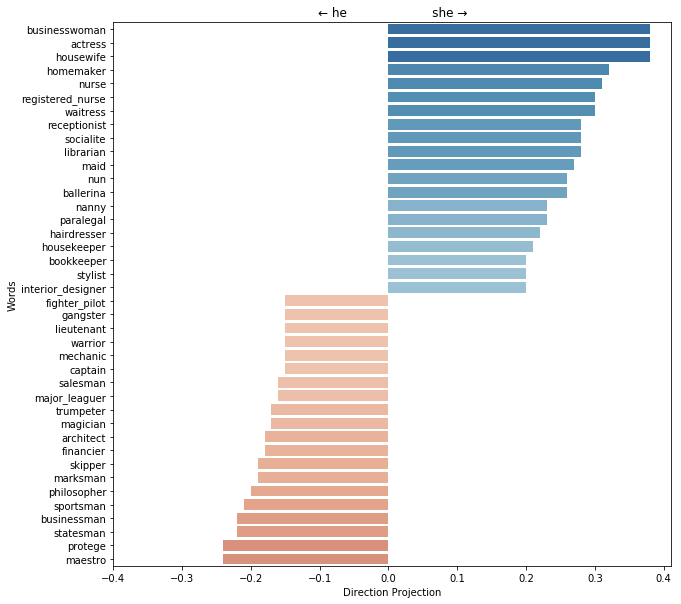

In [ ]:
import matplotlib.pylab as plt

f, ax = plt.subplots(1, figsize=(10, 10))

w2v_small_gender_bias.plot_projection_scores(n_extreme=20, ax=ax);

EXTRA: Demo - Visualizing gender bias with [Word Clouds](http://wordbias.umiacs.umd.edu/)

## 3.8 - Are the projections of occupation words on the gender direction related to the real world?

Let's take the percentage of female in various occupations from the Labor Force Statistics of 2017 Population Survey.

Taken from: https://arxiv.org/abs/1804.06876

In [ ]:
from operator import itemgetter  # 🛠️ For idiomatic sorting in Python

from responsibly.we.data import OCCUPATION_FEMALE_PRECENTAGE

sorted(OCCUPATION_FEMALE_PRECENTAGE.items(), key=itemgetter(1))

[('carpenter', 2),
 ('mechanician', 4),
 ('construction_worker', 4),
 ('laborer', 4),
 ('driver', 6),
 ('sheriff', 14),
 ('mover', 18),
 ('developer', 20),
 ('farmer', 22),
 ('guard', 22),
 ('chief', 27),
 ('janitor', 34),
 ('lawyer', 35),
 ('cook', 38),
 ('physician', 38),
 ('ceo', 39),
 ('analyst', 41),
 ('manager', 43),
 ('supervisor', 44),
 ('salesperson', 48),
 ('editor', 52),
 ('designers', 54),
 ('accountant', 61),
 ('auditor', 61),
 ('writer', 63),
 ('baker', 65),
 ('clerk', 72),
 ('cashier', 73),
 ('counselors', 73),
 ('attendant', 76),
 ('teacher', 78),
 ('sewer', 80),
 ('librarian', 84),
 ('assistant', 85),
 ('cleaner', 89),
 ('housekeeper', 89),
 ('nurse', 90),
 ('receptionist', 90),
 ('hairdressers', 92),
 ('secretary', 95)]

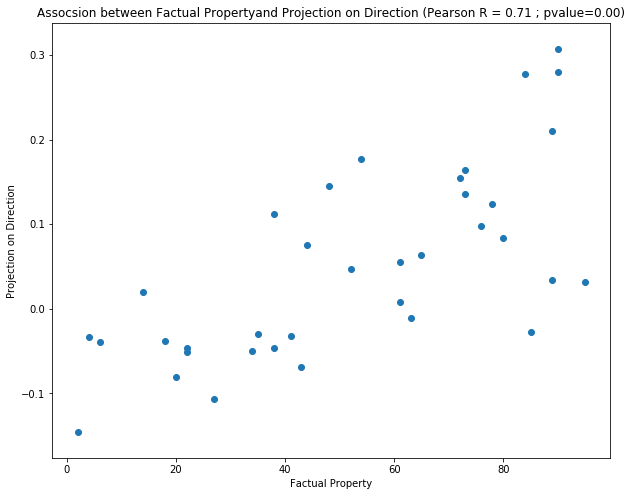

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 8))

w2v_small_gender_bias.plot_factual_association(ax=ax);

## 3.9 - Direct Bias Measure

1. Project each **neutral profession names** on the gender direction
2. Calculate the absolute value of each projection
3. Average it all

In [ ]:
# using responsibly

w2v_small_gender_bias.calc_direct_bias()

0.07307905466893873

## Exercise 3.0: Calculate the average of absolute score of gender neutral profession names.

In [ ]:
# Calculating neutral projection of each name from neutral_profession_names by multiplying with gender bias direction
neutral_profession_projections = [w2v_small[word] @ w2v_small_gender_bias.direction
                                  for word in neutral_profession_names]
# Calculate absolute score of each projection


abs_neutral_profession_projections = ### Your code goes here

sum(abs_neutral_profession_projections) / len(abs_neutral_profession_projections) 

# Part Four: Mitigating Bias

> We intentionally do not reference the resulting embeddings as "debiased" or free from all gender bias, and
prefer the term "mitigating bias" rather that "debiasing," to guard against the misconception that the resulting
embeddings are entirely "safe" and need not be critically evaluated for bias in downstream tasks. <small>James-Sorenson, H., & Alvarez-Melis, D. (2019). [Probabilistic Bias Mitigation in Word Embeddings](https://arxiv.org/pdf/1910.14497.pdf). arXiv preprint arXiv:1910.14497.</small>

## 4.1 - Neutralize

In this case, we will remove the gender projection from all the words, except the neutral-gender ones, and then normalize.

We need to "learn" what are the gender-specific words in the vocabulary for a seed set of gender-specific words (by semi-automatic use of [WordNet](https://en.wikipedia.org/wiki/WordNet))

In [ ]:
w2v_small_gender_debias = w2v_small_gender_bias.debias(method='neutralize', inplace=False)

In [ ]:
print('home:',
      'before =', w2v_small_gender_bias.model['home'] @ w2v_small_gender_bias.direction,
      'after = ', w2v_small_gender_debias.model['home'] @ w2v_small_gender_debias.direction)

home: before = 0.011340496779172262 after =  -1.1762454503583112e-09


## Exercise 4.0: Calcualte gender direction score for word "man" before and after debiasing.

In [ ]:
## Your code goes here

## Exercise 5: Similar to 3.7 and 3.8 draw direction projection vs words and factual property vs direction projection graph? Do you see any improvement?

In [ ]:
## Your code goes here